# This is the codes for free exploration

In [1]:
#reading/merging/selecting data
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

codes_dir =  Path("/codes")
data_dir = codes_dir / "tab_data"
fig_dir  = codes_dir / "stats" / "figs"
sys.path.append(str(codes_dir))

# data files
matched_des_all_file = data_dir/ 'matched_Des-all_qced.csv'
matched_DKT_all_file = data_dir/ 'matched_DKT-all_qced.csv'
data_df = pd.read_csv(matched_DKT_all_file , sep=',', header=0, index_col=0);

cerebellum_list_old = ['Left_Cerebellum_White_Matter','Left_Cerebellum_Cortex','Right_Cerebellum_White_Matter','Right_Cerebellum_Cortex'];
cerebellum_list = ['L_WM','L_GM','R_WM','R_GM'];
data_df[cerebellum_list]=data_df.loc[:,cerebellum_list_old];
data_df=data_df.drop(columns=cerebellum_list_old);

220510-07:58:56,345 nipype.utils WARNING:
	 A newer version (1.7.1) of nipy/nipype is available. You are using 1.5.0


In [2]:
cerebellum_list = ['age', 'sex', 'site', 'group', 'eTIV','cerebellumVol','L_WM','L_GM','R_WM','R_GM', 'Left_cerebellar_GM_SUIT', 'Right_cerebellar_GM_SUIT', 'Left_cerebellar_GM_MAGeT', 'Right_cerebellar_GM_MAGeT', 'L_CM', 'R_CM']
cerebellum_rename_list = ['age', 'sex', 'site', 'group', 'eTIV','cerebelVol_fs','L_WM_fs','L_GM_fs','R_WM_fs','R_GM_fs', 'L_GM_SUIT', 'R_GM_SUIT', 'L_GM_MAGeT', 'R_GM_MAGeT', 'L_WM_MAGeT', 'R_WM_MAGeT']
sel_df = data_df[cerebellum_list].copy()
sel_df.columns=cerebellum_rename_list
sel_df['cerebelVol_MAGeT']=sel_df[['L_GM_MAGeT', 'R_GM_MAGeT', 'L_WM_MAGeT', 'R_WM_MAGeT']].sum(axis=1)
sel_df

,age,sex,site,group,eTIV,cerebelVol_fs,L_WM_fs,L_GM_fs,R_WM_fs,R_GM_fs,L_GM_SUIT,R_GM_SUIT,L_GM_MAGeT,R_GM_MAGeT,L_WM_MAGeT,R_WM_MAGeT,cerebelVol_MAGeT
sub_100S4511,70,M,adni_100,NC,1.577717e+06,140936.2,15911.9,55331.8,15545.1,54147.4,49481,47611,55152.4368,56997.1818,8456.14,8501.52,129107.2786
sub_130S4343,83,M,adni_130,NC,1.540316e+06,119283.5,13456.3,45573.4,13610.6,46643.2,45346,43099,45437.9069,46858.7058,7585.18,8020.78,107902.5727
sub_002S4225,70,M,adni_002,NC,1.880481e+06,142395.8,16486.6,54874.6,15451.0,55583.6,56237,54431,56023.0859,58585.0977,9241.18,9451.18,133300.5436
sub_041S4083,85,M,adni_041,NC,1.677110e+06,145966.8,14308.6,57239.2,14488.5,59930.5,52050,49732,58970.7283,62516.1240,8671.15,9394.63,139552.6323
sub_032S4429,79,M,adni_032,NC,1.614707e+06,112121.9,10650.4,44728.0,11245.3,45498.2,45706,43975,43246.9342,45399.7143,6390.02,7072.83,102109.4985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub_5700,65,M,mni_001,ET,1.602228e+06,134420.9,13890.8,52756.7,13472.8,54300.6,66754,63918,51386.0000,56595.0000,7176.00,7341.00,122498.0000
sub_7000,60,M,mni_001,ET,1.543190e+06,139760.4,15254.4,54279.0,14120.7,56106.3,67618,66494,53910.0000,59231.0000,7541.00,7869.00,128551.0000
sub_7400,73,F,mni_001,ET,1.378966e+06,117097.1,12815.0,45502.6,11768.4,47011.1,57294,56054,44479.0000,46431.0000,6790.00,6631.00,104331.0000
sub_7800,61,M,mni_001,ET,1.230589e+06,125918.1,13014.1,50390.7,12612.5,49900.8,60075,58351,49580.0000,52117.0000,6255.00,6737.00,114689.0000


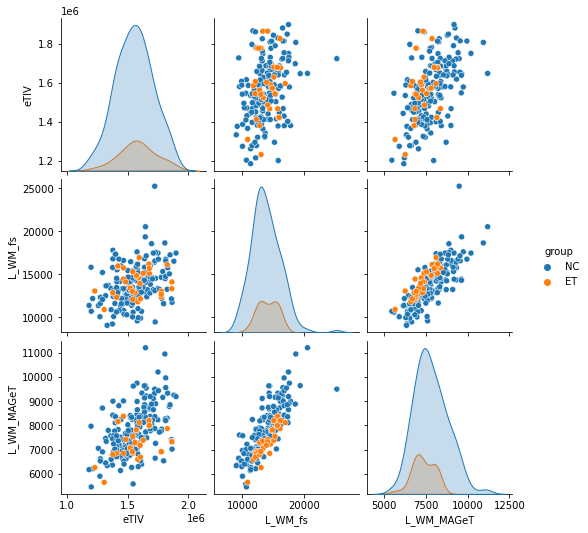

In [3]:
vis_df=sel_df[['group','eTIV','L_WM_fs', 'L_WM_MAGeT']].copy()
sns.pairplot(vis_df, hue="group")

# OVERLAP Freesurfer and MAGeT segmentations for a good quality subject

<AxesSubplot:xlabel='ROI', ylabel='Volumes'>

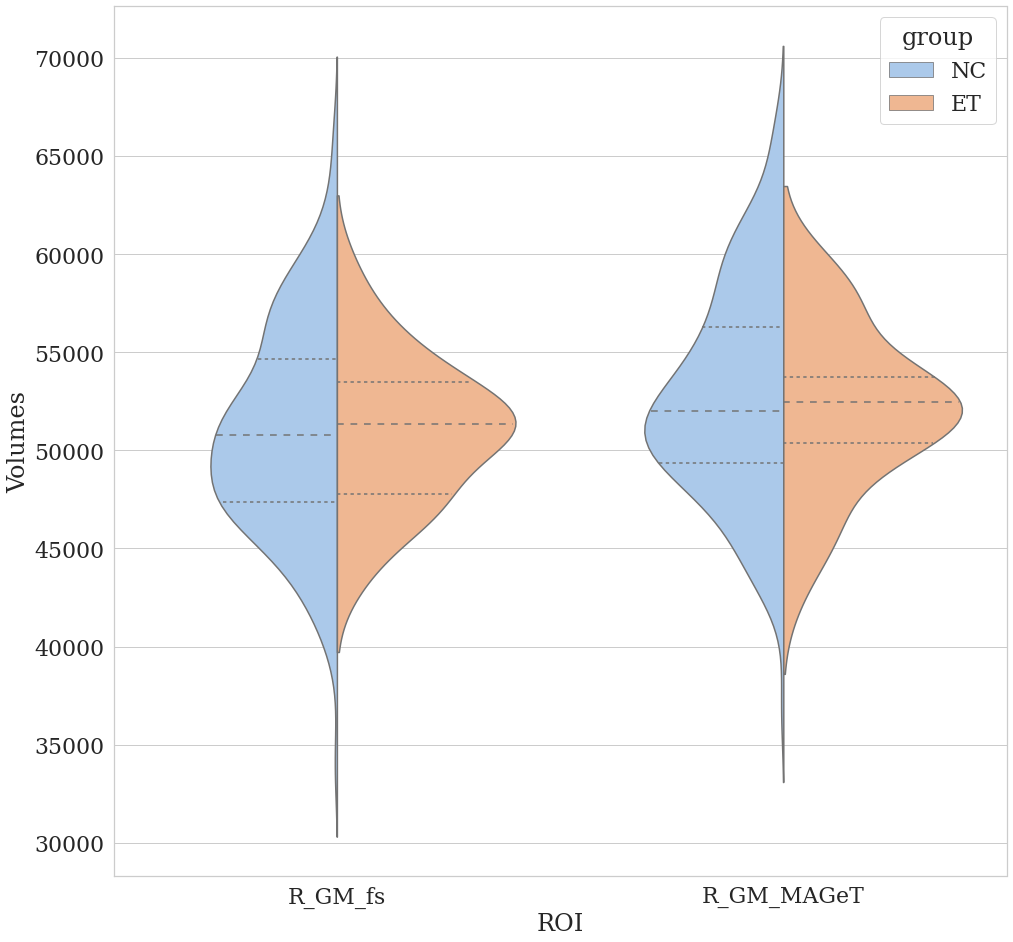

In [4]:
tar_list = ['R_GM_fs', 'R_GM_MAGeT']
vis_df=sel_df[['group','eTIV']+tar_list].copy()
vis_long_df = vis_df.melt(id_vars=['group'], value_vars=tar_list, var_name='ROI', value_name='Volumes').copy()

FONT_SCALE=2
figure_size=(16,16)
sns.set_theme(style="whitegrid", palette="pastel", font_scale=FONT_SCALE)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray') 
sns.violinplot(data=vis_long_df, x="ROI", y="Volumes", hue="group",
               split=True, inner='quartile')

<AxesSubplot:xlabel='ROI', ylabel='Volumes'>

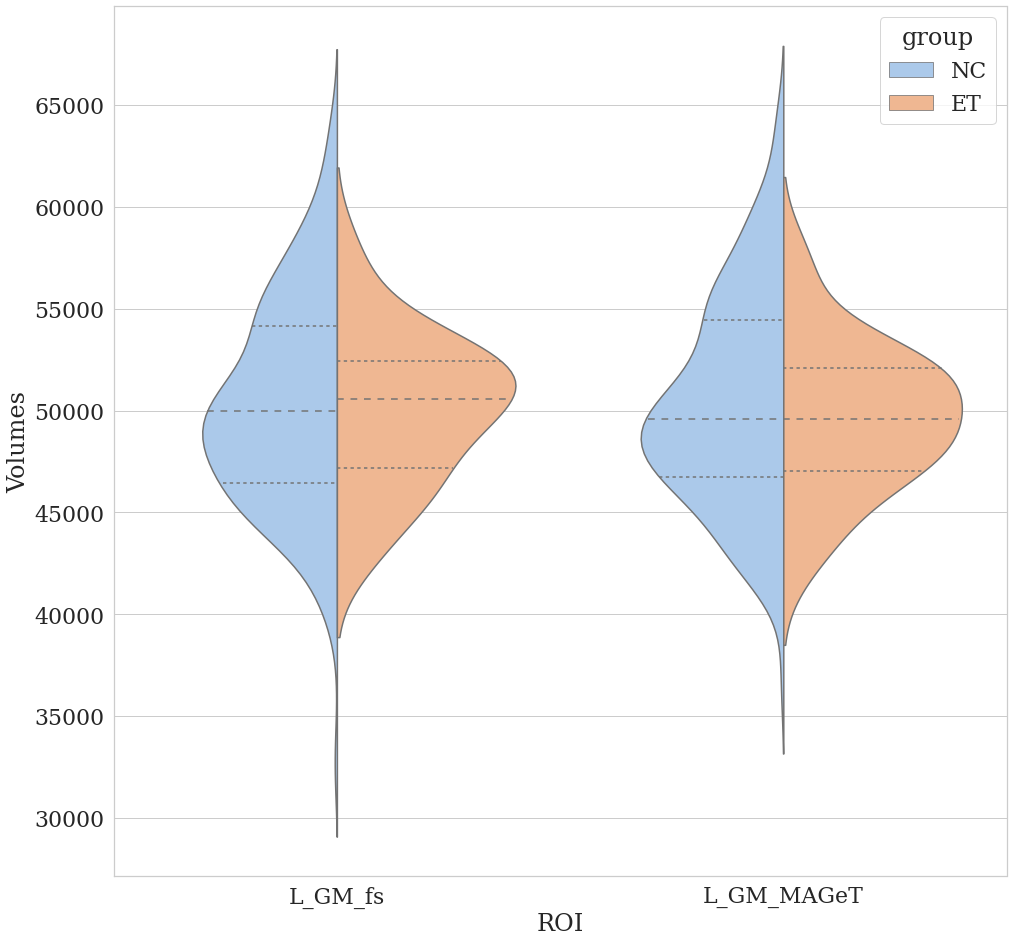

In [5]:
tar_list = ['L_GM_fs', 'L_GM_MAGeT']
vis_df=sel_df[['group','eTIV']+tar_list].copy()
vis_long_df = vis_df.melt(id_vars=['group'], value_vars=tar_list, var_name='ROI', value_name='Volumes').copy()
vis_long_df

FONT_SCALE=2
figure_size=(16,16)
sns.set_theme(style="whitegrid", palette="pastel", font_scale=FONT_SCALE)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray') 
sns.violinplot(data=vis_long_df, x="ROI", y="Volumes", hue="group",
               split=True, inner='quartile')

<AxesSubplot:xlabel='ROI', ylabel='Volumes'>

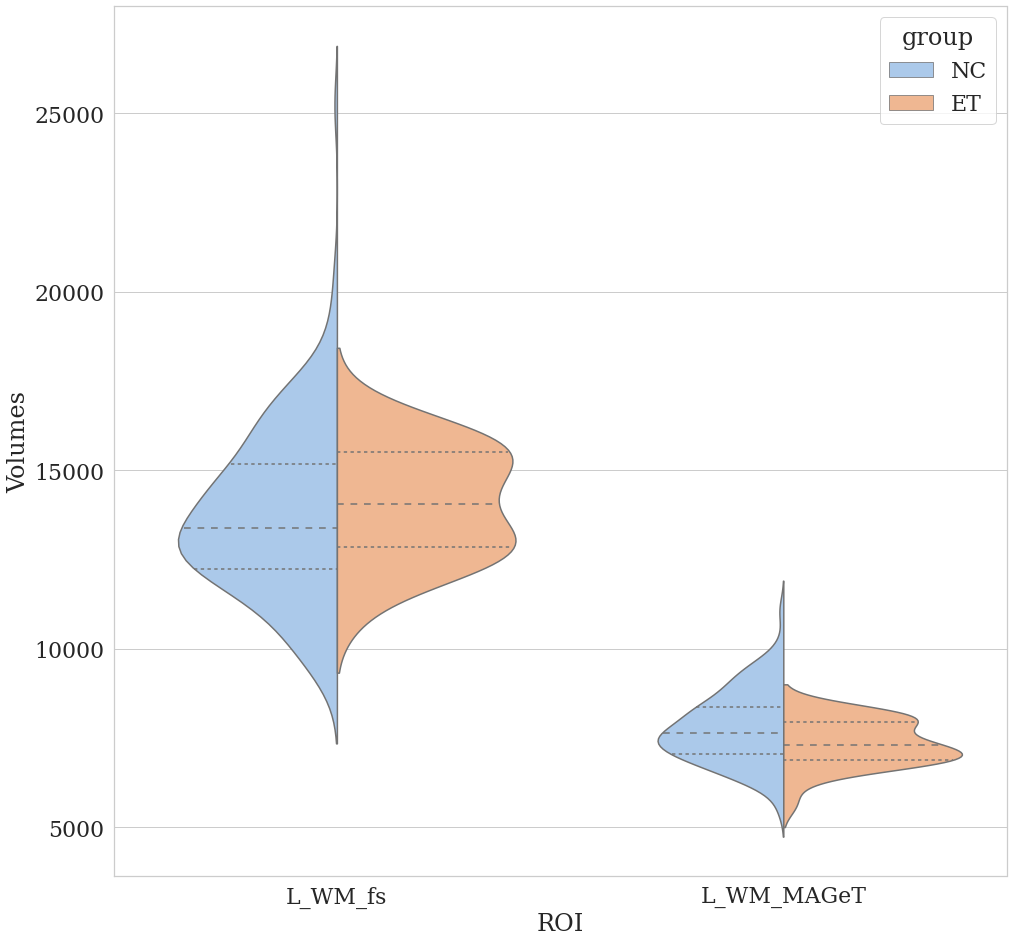

In [6]:
tar_list = ['L_WM_fs', 'L_WM_MAGeT']
vis_df=sel_df[['group','eTIV']+tar_list].copy()
vis_long_df = vis_df.melt(id_vars=['group'], value_vars=tar_list, var_name='ROI', value_name='Volumes').copy()

FONT_SCALE=2
figure_size=(16,16)
sns.set_theme(style="whitegrid", palette="pastel", font_scale=FONT_SCALE)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray') 
sns.violinplot(data=vis_long_df, x="ROI", y="Volumes", hue="group",
               split=True, inner='quartile')

In [7]:
display(vis_df.sort_values(by=tar_list, ascending=False)[:5])
data_df.loc["sub_3011",:]
# we have inspected the freesurfer results of sub_3022
# the quality is 2 for freesurfer which is not good, we saw an overestimation of white matter, it is the same with the general trend of freesurfer results.

,group,eTIV,L_WM_fs,L_WM_MAGeT
sub_3011,NC,1.722964e+06,25222.2,9490.78
sub_073S4795,NC,1.647276e+06,20496.7,11196.00
sub_031S4021,NC,1.645923e+06,19316.8,9634.87
sub_3635,NC,1.806403e+06,18611.8,10938.60
sub_3358,NC,1.696767e+06,18520.0,8874.00


age                                  32
sex                                   M
site                           ppmi_001
group                                NC
Left_Lateral_Ventricle          10383.9
                                ...    
Right_cerebellar_GM_MAGeT    65869.1077
L_WM                            25222.2
L_GM                            57000.7
R_WM                            27589.0
R_GM                            58309.0
Name: sub_3011, Length: 482, dtype: object

<AxesSubplot:xlabel='ROI', ylabel='Volumes'>

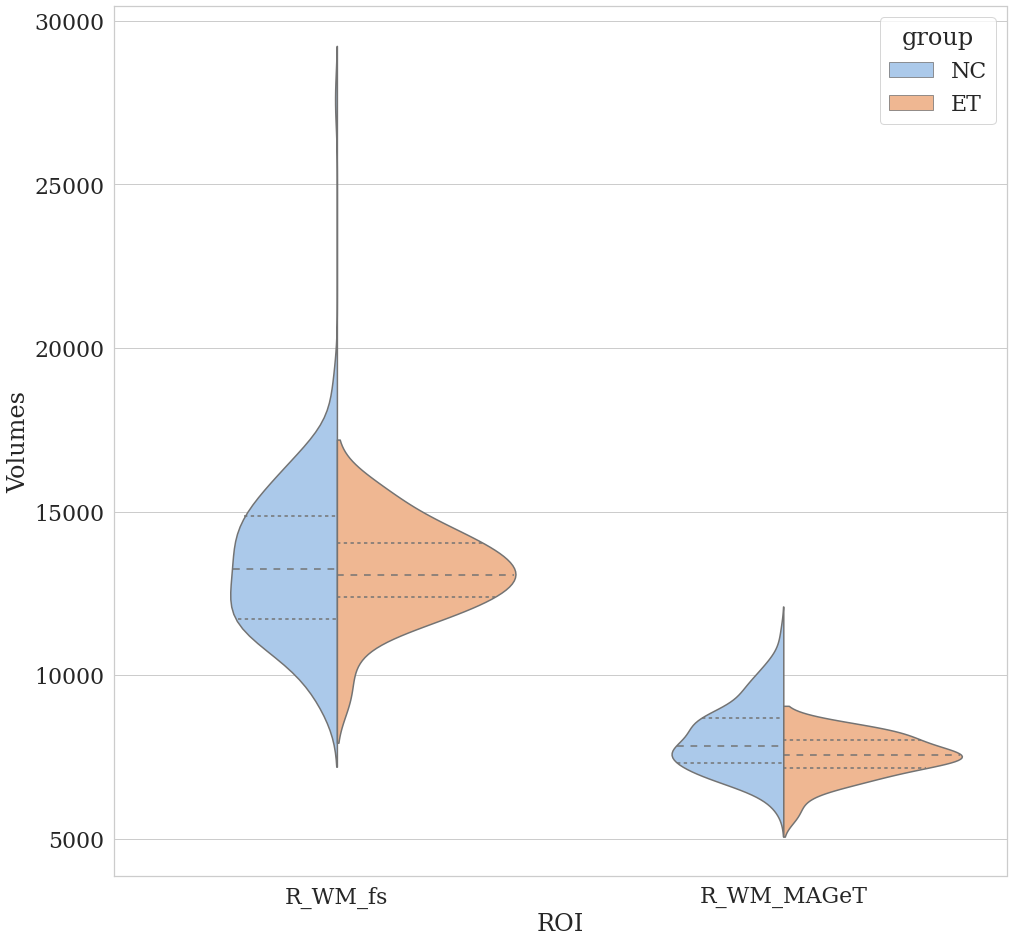

In [8]:
tar_list = ['R_WM_fs', 'R_WM_MAGeT']
vis_df=sel_df[['group','eTIV']+tar_list].copy()
vis_long_df = vis_df.melt(id_vars=['group'], value_vars=tar_list, var_name='ROI', value_name='Volumes').copy()
vis_long_df

FONT_SCALE=2
figure_size=(16,16)
sns.set_theme(style="whitegrid", palette="pastel", font_scale=FONT_SCALE)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

plt.subplots(figsize=figure_size, facecolor='w', edgecolor='lightgray') 
sns.violinplot(data=vis_long_df, x="ROI", y="Volumes", hue="group",
               split=True, inner='quartile')

,eTIV,cerebelVol_fs,cerebelVol_MAGeT,L_GM_fs,L_WM_fs,R_WM_fs,R_GM_fs,L_GM_SUIT,R_GM_SUIT,L_GM_MAGeT,L_WM_MAGeT,R_WM_MAGeT,R_GM_MAGeT
eTIV,1.000000,0.552386,0.572541,0.555767,0.349775,0.341333,0.568785,0.301127,0.297858,0.537087,0.492787,0.510557,0.566232
cerebelVol_fs,0.552386,1.000000,0.980480,0.951538,0.778016,0.764112,0.955259,0.555467,0.557412,0.966622,0.780135,0.780902,0.955752
cerebelVol_MAGeT,0.572541,0.980480,1.000000,0.955302,0.708626,0.705926,0.957646,0.487860,0.491655,0.984998,0.776673,0.785447,0.981295
L_GM_fs,0.555767,0.951538,0.955302,1.000000,0.580314,0.553454,0.963062,0.518762,0.518040,0.967122,0.673810,0.666251,0.941991
L_WM_fs,0.349775,0.778016,0.708626,0.580314,1.000000,0.924182,0.581106,0.467332,0.460075,0.674208,0.792083,0.772771,0.630342
R_WM_fs,0.341333,0.764112,0.705926,0.553454,0.924182,1.000000,0.572419,0.379000,0.378670,0.658422,0.764673,0.780209,0.642901
R_GM_fs,0.568785,0.955259,0.957646,0.963062,0.581106,0.572419,1.000000,0.544273,0.553314,0.946534,0.656796,0.667947,0.969389
L_GM_SUIT,0.301127,0.555467,0.487860,0.518762,0.467332,0.379000,0.544273,1.000000,0.996457,0.479949,0.331949,0.277972,0.508656
R_GM_SUIT,0.297858,0.557412,0.491655,0.518040,0.460075,0.378670,0.553314,0.996457,1.000000,0.477696,0.330379,0.281523,0.518752
L_GM_MAGeT,0.537087,0.966622,0.984998,0.967122,0.674208,0.658422,0.946534,0.479949,0.477696,1.000000,0.705758,0.710099,0.962039


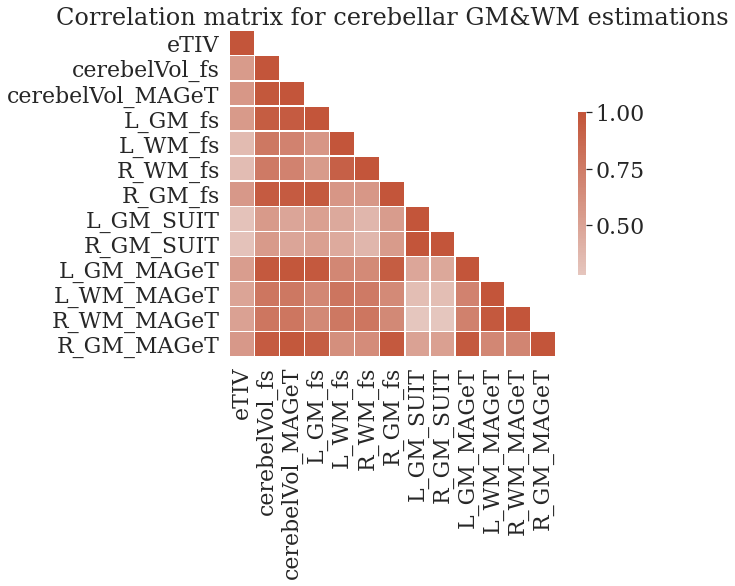

In [9]:
# Deprecated: report correlation between the intracranial volumes for controling
tar_list = [ 'eTIV','cerebelVol_fs','cerebelVol_MAGeT','L_GM_fs','L_WM_fs','R_WM_fs','R_GM_fs', 'L_GM_SUIT', 'R_GM_SUIT', 'L_GM_MAGeT', 'L_WM_MAGeT', 'R_WM_MAGeT', 'R_GM_MAGeT'];

corr_=sel_df[tar_list].corr();
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Augmented dataset
mask = np.triu(np.ones_like(corr_, dtype=bool), k=1)
f, ax = plt.subplots(figsize=(8, 6))
ax=sns.heatmap(corr_, mask=mask, cmap=cmap, vmax=1, center=0,
               square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation matrix for cerebellar GM&WM estimations')
display(corr_)